# Results and Conclusion

<hr style="height:2pt">

## Summary

Music Recommender Systems (MRS), such as Spotify, aim at finding appropriate songs to recommend to users. Doing so successfully may increase user engagement by facilitating the creation of playlists by users, and by extending listening beyond the end of the existing playlists. Our goal in this exercise was to create a machine learning algorithm that would best suggest songs to an existing playlist, to the extent allowed by the timeline of this project and resources provided. 

We chose a Random Forest model for predicting the genre of a given playlist, with accuracy on the test set of XX%. We also tried multiple other models, such as a simple logistic regression, a polynomial logistic regression, Linear Discriminant Analysis (LDA), Quadratic Discriminant Analysis (QDA) and Boosting, but none of these performed better than the selected Random Forest model. Once the genre of a given playlist was predicted, we recommended songs that belonged to that genre, and that would most closely resemble the features of the songs of the given playlist. Our final model used cosine similarity between the vector of features of the songs in the given playlist, and the vector of features of subset of songs of the same genre in the pool of songs to be recommended.

The input used was the Million Playlist Dataset, which we complemented with our secondary source of data taken from Spotify’s Web API. The final output of the model is the recommendation of a set of N songs (from a pool of XXX unique songs that we created) to be added to a given playlist. Given the unsupervised nature of this problem (the songs or playlists did not have a pre-defined class), we explored different ways to generate classifications to support our machine learning algorithm. Based on our Exploratory Data Analysis (EDA) and literature review, we decided to classify each song into five different genres (rock, poprock, pop, rap and others), and we used that to classify each playlist, according to the most frequent genre of songs in the playlist. Given the importance of having a similar distribution of playlists among the five classes for fitting the machine learning models, we manually created a sample dataset. More details about this process can be found in the “creating final dataset” section of this website. 


In [6]:
from IPython.display import Image

## Results 

We used different modeling methods for the 5-genres classification problem, using the variables from EDA part.

**Variables:**

'duration_ms', 'time_signature', 'key', 'tempo', 'energy', 'mode', 'loudness', 'speechiness', 'danceability', 'acousticness', 'instrumentalness', 'valence', 'liveness', 'artist_followers'

**Model**
**Base decision tree model and random forest:**

The random forest outperforms all of the other modeling methods based on the average of cross validation scores, thus we chose to use random forest as our prediction modeling method, even it has sign of overfitting. the base model for that is the decision tree with the depth of 16. In order to find the best depth for the baseline tree model, we used tunning of the depth as a hyperparameter of the signle decsiosn tree, in below picture you can see the results of the test and training score of the single decision tree for different depth level.
The performance of the random forest on training set is1, while on the test set is 0.71 and the average of the cross validation scores on the test set is 0.67.


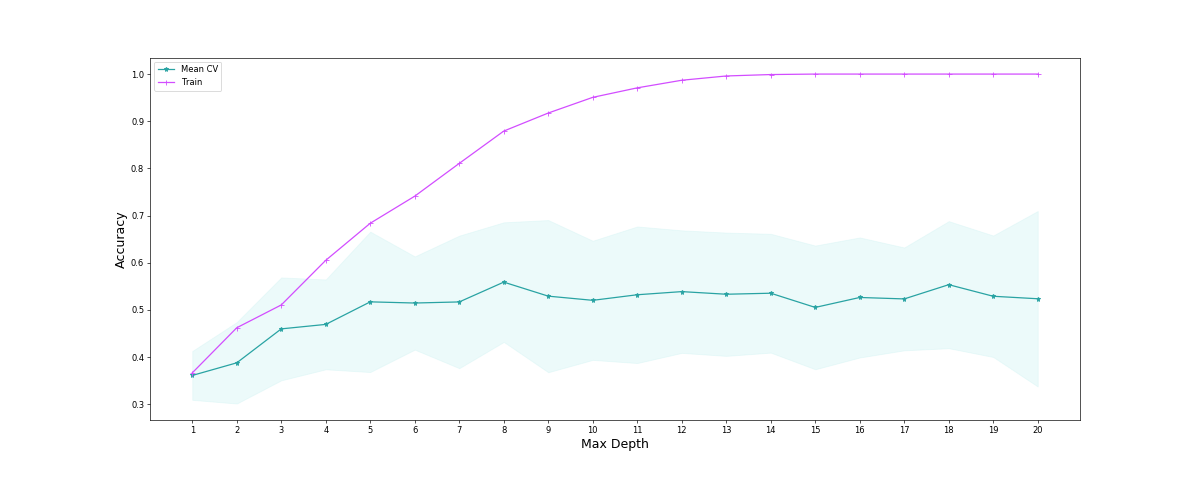

In [8]:
Image("img/trees_perf.png",width=1000, height=600)

Below you can find the boxplot of the cross validation scores of the different models on the test set.

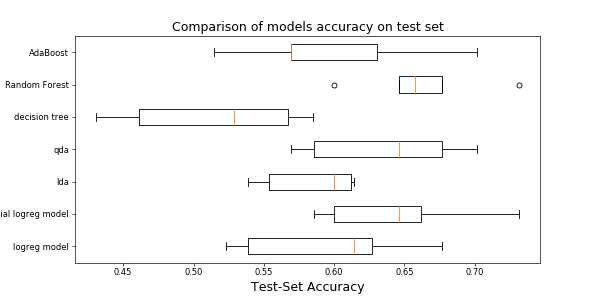

In [17]:
Image("img/boxplot.png",width=600, height=600)

In below table you can find the performance summary of different modeling methods.

| **Method**                               | Train Score | Test Score |  Average CV Test Score | Running Time | HyperParamether                                             |
|------------------------------------------|-------------|------------|------------------------|--------------|-------------------------------------------------------------|
| Logistic regression with CV              | 0.61        | 0.60       | 0.60                   | 0.67         |                                                             |
| Polynomial logistic regression with CV   | 0.75        | 0.69       | 0.65                   | 2.74         | poly degree = 2                                             |
| LDA                                      | 0.62        | 0.63       | 0.59                   | 0.016        |                                                             |
| QDA                                      | 0.66        | 0.62       | 0.63                   | 0.01         |                                                             |
| **Baseline model**: Simple Decision Tree | 1           | 0.52       | 0.51                   | 0.012        | depth = 16                                                  |
| Random Forest                            | 1           | 0.71       | 0.67                   | 1.03         | base tree depth = 16 number of trees = 500                  |
| AdaBoost                                 | 0.97        | 0.63       | 0.60                   | 0.49         | Max depth = 6, number of estimators=60,  learning rate=0.05 |



**Explaination of the other methods:**

**Logistic regression with cross validation**

The score of logistic regression with cross validation on the training and test sets are, 0.61 and 0.60 respectively. From this results, we can say there is room of adding more predicting variables to the model, in order to improve its predicting power.

**Polynomial logistic regression with CV**
The performance of the model improved slighlty by adding polynomial feature to the x set. The average cross validation score on the training set is 0.75 and on the test is 0.65. And, this difference between the training and test score is the sign of overfitting in this model.

**LDA**
The performance of the LDA is less than the other method, but it seems there is no sign of overfitting in this model due to close scores on the training and test set, which are, 0.62 and 0.59 respectively.

**QDA**
The train score for the baseline decision tree is 0.66, while the test score is 0.63. The comparison  and improvement of the QDA test score vs LDA score shows that the assumption the uniform coavriances is limitation for the performace of the model. And the flexiblity of QDA model, improved the reuslt slightly without the sign of overfitting.

**AdaBoost**
The training score of 0.97 vs the test score of 0.60 is the sign of overfitting in this model. And in below picture you can find the performance of the model on test set for different iterations. And as we saw with higher number of iteration is started to get overfitted more.


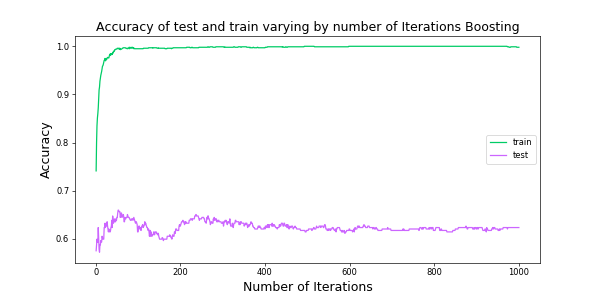

In [15]:
Image("img/adaboost.png",width=700, height=400)

## Conclusion and Future Work

Our work resulted in a model that, based on the prediction of the gender of a given playlist, recommends songs that closely match the features of the songs contained in that given playlist. While we understand the limitations of our work and its contribution, we are thankful for how much we have learned and the accomplishments achieved throughout the project, particularly by tackling some challenges that we did not face during the course, making this project complimentary to the rest of the class. 

A few instances of these challenges included collecting data by using Spotify’s Web API, working with an unsupervised learning case, building a website, and finding a methodology to recommend songs appropriately to a given playlist. The support from the Data Science teaching team, together with our literature review, was paramount in helping us deal with these challenges. In testing our work, we achieved XX% accuracy on the prediction of our model, and by listening to a sample of songs recommended to a given playlists, we saw (subjectively) that our model satisfactorily recommends songs aligned with the characteristics of a given playlist. 
    
We also recognize that there are ample areas in which our work could be improved, including, but not limited to: 

    • Classification 
        o Further breaking down the classification of genres
        o Including other aspects (beyond pure gender) in the classification of the songs, such as whether the song is instrumental
    • Features
        o Increase the number of features used
        o Include features that describe the users (eg: age, language, location)
        o Further explore variable selection methods (Lasso, Ridge, forward and backward selection)
        o Use lyric features as predictors
    • Model improvement 
        o Test other machine learning models (eg: Neural Networks, Support Vector Machine)
        o Further tune the hyperparameters of the models we have used (eg: tree depths and number of trees in AdaBoosting)
    • Data Set (our sample)
        o Use larger datasets for the sources we used (eg: more playlists in the train/test sets, or for the pool of songs to be recommended)
        o Include other sources of data to compliment what we have used (eg: Million Song Dataset, Lyrics Wiki)
    • Song Suggestion
        o Adjust our cosine similarity model to suggest songs in the proportion of the genres of songs in the given playlist (as opposed to suggesting all songs of the same genre as the predicted genre of the playlist)
        o Explore other methods for recommending songs

